# Making Cool Visualizations from Images



## Imports


Pandas is an all-purpose package for working with tables. 

Plotly is my favorite chart-builder for python. However, MatplotLib and Seaborn can do the exact same things! It is here to preview the plots prior to the data being brought into Tableau. 

PIL (Python Image Library, otherwise known as Pillow) allows for image manipulation.

NumPy and Random are for generating the points. 

In [52]:
import pandas as pd
import plotly.express as px
from PIL import Image
import numpy as np
import random

# Loading our Image

Start by using PIL to load the image and convert it to grayscale. 

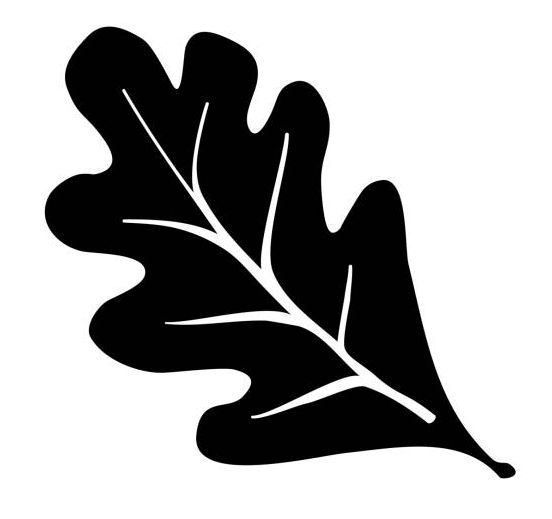

In [53]:
image_path = r"images\OakLeaf.png"
img = Image.open(image_path).convert("L")
display(img)

Then create a NumPy array. This also provides the height and width.

In [54]:
img_array = np.array(img)

#What are we making?
print(img_array[100])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 244 255 254 251
  93   0   0   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   0   1   0
   0  87 250 255 252  95   9   0   7   8   0   0   4   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   0   8   7   0   0   4   4   0   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   0   4   2   

While it does not look like much, this is actually the image! All of the points correspond to a pixel in the data. Pixels with the value **255** are white, while pixels with **0** are black. This will be how we determine where the points need to be generated. 

# Finding The Shape of the Shape

To define a shape, look for pixels within a certain **threshold** of black. If a pixel's value is less than the threshold, store the X and Y position in a tuple and add it to an array of coordinates. 

In [55]:
height, width = img_array.shape

#as white = 255 and black = 0, we could say anything under 128 is dark enough to be the shape we are looking for
threshold = 128

coords = []
#as a for loop
for y in range(height):
    for x in range(width):
        if img_array[y, x] < threshold:
            coords.append((x, y))

#as a list comphrehension.
coords = [(x, y)
            for y in range(height) 
            for x in range(width) 
            if img_array[y, x] < threshold]

Now that the coordinates are defined, randomly sample a desired number of points. 

In [56]:
num_points = 5000

sampled_coords = random.sample(coords, min(num_points, len(coords)))

Then store it in a dataframe for displaying and joining with the original dataset.

In [57]:
df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

# Seeing the Scatter Plot

In [58]:
fig = px.scatter(df, x="x", y="y", width=600, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, visible=True),
    yaxis=dict(showgrid=False, visible=True),
)

fig.update_traces(marker=dict(size=3, color='darkgrey', opacity=0.8))

fig.show()

Ta-Da! 

It's upside down. This makes sense, all the points were appended to our array starting at y=0.

In [59]:
df['y'] = (height // 2) - df['y']

In [60]:
fig = px.scatter(df, x="x", y="y", width=600, height=600)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=False, visible=True),
    yaxis=dict(showgrid=False, visible=True),
)

fig.update_traces(marker=dict(size=3, color='darkgrey', opacity=0.8))

fig.show()

It's a very easy flip.

I personally prefer the data be centered around (0,0) for tableau

In [61]:
df['x'] = df['x'] - (width // 2)
df['y'] = (height // 2) - df['y']

This is optional!

# Putting it all together!

The above section breaks the code into more detail, but we really just want to quickly generate plots to test and see what we want to keep. 

As such, it makes sense for this to be a function instead of segmented code blocks. 

In [62]:
def image_to_points(image_path, num_points=500, threshold=128):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)

    height, width = img_array.shape

    # Get all pixel coordinates below the threshold
    coords = [(x, y) for y in range(height) for x in range(width) if img_array[y, x] < threshold]

    if len(coords) == 0:
        raise ValueError("No dark pixels found in image.")

    # Sample a limited number of points
    sampled_coords = random.sample(coords, min(num_points, len(coords)))
    df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

    # Center coordinates around (0, 0)
    df['x'] = df['x'] - (width // 2)
    df['y'] = (height // 2) - df['y']  # Flip y

    return df

In [63]:
def plot_points(df, mark_size = 3):
    fig = px.scatter(df, x="x", y="y", width=600, height=600)

    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(showgrid=False, visible=True),
        yaxis=dict(showgrid=False, visible=True),
    )

    fig.update_traces(marker=dict(size=mark_size, color='darkgrey', opacity=0.8))
    fig.update_yaxes(scaleanchor="x", scaleratio=1)

    fig.show()

# All in one step!

In [64]:
image_path = r"images\OakLeaf.png"
points_df = image_to_points(image_path, num_points=2000)
plot_points(points_df, 3)

# Expanding this with symmetry

One of my major gripes with Automeris was the lack of symmetrical points. Luckily, that is easy to add!

In [65]:
def image_to_points_symmetry(image_path, num_points=500, x_symmetry=False, y_symmetry=False, threshold=128):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)

    height, width = img_array.shape

    # Determine region to sample based on symmetry
    x_limit = width // 2 if x_symmetry else width
    y_limit = height // 2 if y_symmetry else height

    # Get coordinates of dark pixels in the sampling region
    coords = [(x, y) for y in range(y_limit) for x in range(x_limit) if img_array[y, x] < threshold]

    if not coords:
        raise ValueError("No dark pixels found in selected region of image.")

    # Determine how many unique points are needed before mirroring
    symmetry_multiplier = 1
    if x_symmetry: symmetry_multiplier *= 2
    if y_symmetry: symmetry_multiplier *= 2

    # Avoid oversampling if not enough base points exist
    max_base_points = len(coords)
    needed_base_points = min(num_points // symmetry_multiplier + (num_points % symmetry_multiplier > 0), max_base_points)

    sampled_coords = random.sample(coords, needed_base_points)
    df = pd.DataFrame(sampled_coords, columns=['x', 'y'])

    # Generate mirrored points
    mirrored_dfs = [df]
    if x_symmetry:
        mirrored_dfs.append(df.assign(x=lambda d: width - d['x']))
    if y_symmetry:
        mirrored_dfs.append(df.assign(y=lambda d: height - d['y']))
    if x_symmetry and y_symmetry:
        mirrored_dfs.append(df.assign(x=lambda d: width - d['x'], y=lambda d: height - d['y']))

    all_points = pd.concat(mirrored_dfs, ignore_index=True)
    all_points.drop_duplicates(inplace=True)

    # If we have more than needed, sample down
    if len(all_points) > num_points:
        all_points = all_points.sample(n=num_points, random_state=42)
    elif len(all_points) < num_points:
        print(f"Warning: only {len(all_points)} unique points could be generated with current symmetry and threshold.")

    # Center around (0, 0)
    all_points['x'] = all_points['x'] - (width // 2)
    all_points['y'] = (height // 2) - all_points['y']  # Flip y-axis

    return all_points.reset_index(drop=True)

In [66]:
points_df = image_to_points_symmetry(image_path, num_points=2000, x_symmetry=True, y_symmetry=False)
plot_points(points_df)

# Grid Spacing

Instead of sampling randomly, we can also sample in a grid pattern for a more uniform look. 

In [67]:
import numpy as np
import pandas as pd
from PIL import Image

def image_to_equally_spaced_points(image_path, num_points=500, threshold=128, filter_dark_pixels=True, max_attempts=31):
    # Load and convert image to grayscale
    img = Image.open(image_path).convert("L")
    img_array = np.array(img)
    height, width = img_array.shape
    aspect_ratio = width / height

    def generate_grid_points(grid_cols, grid_rows):
        x_coords = np.linspace(0, width - 1, grid_cols, dtype=int)
        y_coords = np.linspace(0, height - 1, grid_rows, dtype=int)
        xv, yv = np.meshgrid(x_coords, y_coords)
        return np.column_stack([xv.ravel(), yv.ravel()])

    # Try multiple attempts to adjust spacing dynamically
    for attempt in range(max_attempts):
        grid_cols = int(np.sqrt(num_points * aspect_ratio)) + attempt
        grid_rows = int(np.ceil(num_points / grid_cols)) + attempt

        points = generate_grid_points(grid_cols, grid_rows)

        if filter_dark_pixels:
            points = np.array([p for p in points if img_array[p[1], p[0]] < threshold])

        if len(points) >= num_points:
            break  # Enough points found, stop refining
        elif attempt == max_attempts - 1 and len(points) < num_points:
            print(f"Warning: Only {len(points)} points found after {max_attempts} attempts.")

    # Sample exactly num_points if more available, else return all
    if len(points) > num_points:
        np.random.seed(42)
        indices = np.random.choice(len(points), num_points, replace=False)
        points = points[indices]

    df = pd.DataFrame(points, columns=['x', 'y'])

    # Center points and flip y-axis
    df['x'] = df['x'] - (width // 2)
    df['y'] = (height // 2) - df['y']

    return df.reset_index(drop=True)

In [68]:
image_path = r"images\OakLeaf.png"
points_df = image_to_equally_spaced_points(image_path, num_points=1000, max_attempts=31)
plot_points(points_df, 5)

# Appending to the Data

Now that we have the ability to generate a DataFrame with our custom image, we can connect our data to the data we wish to visualize. 

In [69]:
import pandas as pd

oaks = pd.read_csv(r"data\NeatTrees.csv", encoding="latin-1")

In [70]:
oaks

,Title,Wiki Link,Blurb
0,Allon Bachuth,https://en.wikipedia.org/wiki/Allon_Bachuth,Oak near Bethel mentioned in Genesis
1,Allerton Oak,https://en.wikipedia.org/wiki/Allerton_Oak,"Tree in Liverpool, England"
2,Arbutus Oak,https://en.wikipedia.org/wiki/Arbutus_Oak,Historic tree in the middle of a highway inter...
3,Angel Oak,https://en.wikipedia.org/wiki/Angel_Oak,Southern live oak
4,Arsenal Oak,https://en.wikipedia.org/wiki/Arsenal_Oak,"Public university in Augusta, Georgia, US"
...,...,...,...
140,Washington Oak,https://en.wikipedia.org/wiki/Washington_Oak,Protected ancient tree in the United States
141,"Winameg, Ohio","https://en.wikipedia.org/wiki/Winameg,_Ohio",NaN
142,Wye Oak,https://en.wikipedia.org/wiki/Wye_Oak,Largest known white oak in the United States
143,Wyndham's Oak,https://en.wikipedia.org/wiki/Wyndham%27s_Oak,NaN


This is a collection of wikipedia pages for notable oak trees, and since there are 144 records, there are not a ton of points to work with for the vis. 

In [82]:
image_path = r"images\canopy_variation.png"
points_df = image_to_equally_spaced_points(image_path, num_points=144, max_attempts=32)
plot_points(points_df, 10)
points_df

,x,y
0,-122,-26
1,-36,-8
2,120,47
3,-36,10
4,-122,-8
...,...,...
139,134,10
140,34,-8
141,-51,-26
142,-107,83


To append the data to our points, we will append them together via index. Since we generated the exact number of points we need, we can simply use join to append our X and Y onto the oak DataFrame. 

In [83]:
final_df = oaks.join(points_df)

Then export as a CSV and use in Tableau!

In [84]:
final_df.to_csv(r"data\oak_top.csv")